In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import networkx as nx
from louvain import detect_communities, modularity

In [3]:
def draw_communities(G, node_size=30, alpha=1, k=None, randomized=False):
    partition = detect_communities(G, randomized=randomized)
    print("Modularity for best partition:", modularity(G, partition))
    community_map = {}
    for community, nodes in enumerate(partition):
        for node in nodes:
            community_map[node] = community
    
    cmap = plt.get_cmap("jet")
    pos = nx.spring_layout(G, k=k)
    indexed = [community_map.get(node) for node in G]
    plt.axis("off")
    
    nx.draw_networkx_nodes(G, pos=pos, cmap=cmap, node_color=indexed, node_size=node_size, alpha=alpha)
    nx.draw_networkx_edges(G, pos=pos, alpha=0.2)

Modularity for best partition: 0.41880341880341804


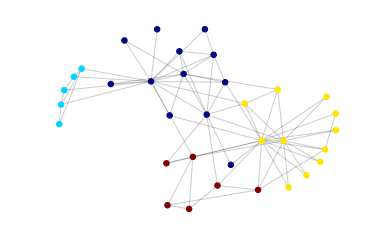

In [4]:
G = nx.karate_club_graph()
draw_communities(G)

In [5]:
def read_facebook_data(file_name):
    G = nx.Graph()
    with open(file_name, "r") as f:
        for line in f:
            if line[0] == "#":
                continue
            N1, N2, weight = map(int, line.split())
            G.add_edge(N1, N2)
    return G

In [6]:
caltech_graph = read_facebook_data(r"Caltech36_matrix.txt")

Modularity for best partition: 0.39563762450618906


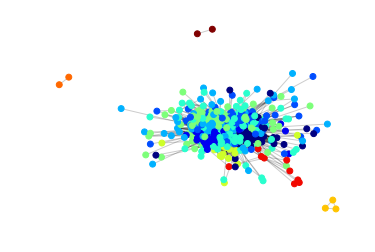

In [7]:
draw_communities(caltech_graph, node_size=35, k=0.12)